Training Data (After Exponential Smoothing)
   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2014-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2014-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2014-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2014-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2014-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture

C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\4021540908.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profit'] = data['Profit'].ewm(alpha=alpha).mean()
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\4021540908.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'] = data['Sales'].ewm(alpha=alpha).mean()


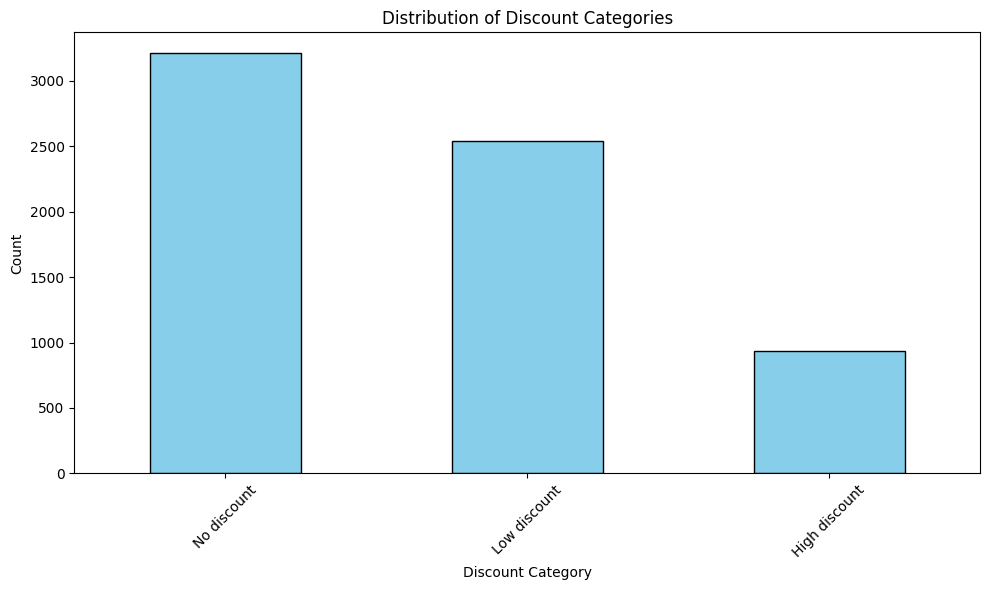

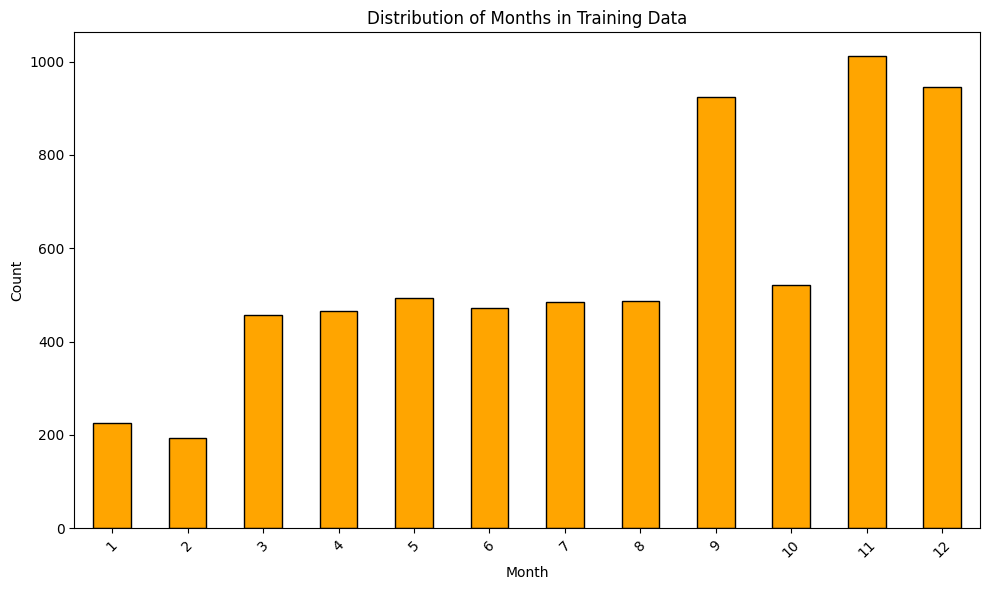

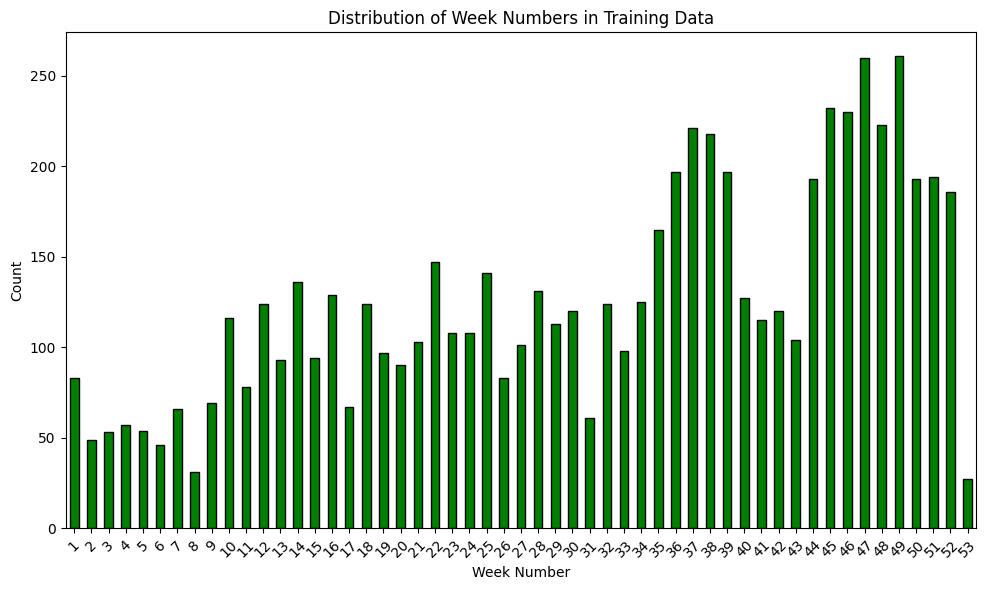

Training Data (After Exponential Smoothing)
(6682, 24)


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Path to the CSV file
file_path = r"C:\Users\Beheerder\Documents\DSAI master\Q5 Courses\Research Topics in Data mining\Sample - Superstore.csv"

# Load the CSV file into a pandas DataFrame with specified encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Categorize 'Discount' values into "No discount", "Low discount", and "High discount"
def categorize_discount(discount):
    if discount == 0:
        return "No discount"
    elif 0 < discount <= 0.2:  # Assuming 20% corresponds to 0.2 in the dataset
        return "Low discount"
    else:
        return "High discount"

# Apply the categorization function to the 'Discount' column
df['Discount Category'] = df['Discount'].apply(categorize_discount)

# Extract Month and Week Number from 'Order Date'
df['Month'] = df['Order Date'].dt.month  # Extract month as an integer (1 for January, 12 for December)
df['Week Number'] = df['Order Date'].dt.isocalendar().week  # Extract ISO week number

# Adjust the 'Order Date' for all dates before 31 December 2016 to make them all in the year 2014
cutoff_date = pd.Timestamp('2016-12-31')

def adjust_to_2014(date):
    # Handle leap year dates like Feb 29 by checking if the adjusted year supports that day
    try:
        if date <= cutoff_date:
            return date.replace(year=2014)
        else:
            return date
    except ValueError:
        # If there is an invalid date, default to February 28
        return datetime(2014, 2, 28)

df['Order Date'] = df['Order Date'].apply(adjust_to_2014)

# Now you can use 'Order Date Adjusted' for both the training and test datasets

# Training dataset: all data with an adjusted order date before or on 31 December 2016
train_data = df[df['Order Date'] <= cutoff_date]

# Test dataset: all data with the order date after 31 December 2016
test_data = df[df['Order Date'] > cutoff_date]

# Apply medium exponential smoothing to reduce the impact of outliers (on 'Profit' and 'Sales' columns)
def apply_exponential_smoothing(data, alpha=0.01):
    # Apply exponential smoothing to 'Profit' and 'Sales'
    data['Profit'] = data['Profit'].ewm(alpha=alpha).mean()
    data['Sales'] = data['Sales'].ewm(alpha=alpha).mean()
    return data

# Apply smoothing to both train and test datasets
train_data = apply_exponential_smoothing(train_data)
test_data = apply_exponential_smoothing(test_data)

# Display the first few rows of the training dataset and the discount categories
print("Training Data (After Exponential Smoothing)")
print(train_data.head())

# Plot the distribution of discount categories in the training data
def plot_discount_category_distribution(df):
    value_counts = df['Discount Category'].value_counts()
    
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Discount Categories')
    plt.xlabel('Discount Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to plot the distribution of discount categories in the training data
plot_discount_category_distribution(train_data)

# Plot the distribution of months in the training data
def plot_month_distribution(df):
    value_counts = df['Month'].value_counts().sort_index()  # Sort by month index
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Distribution of Months in Training Data')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the distribution of week numbers in the training data
def plot_week_distribution(df):
    value_counts = df['Week Number'].value_counts().sort_index()  # Sort by week number
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='green', edgecolor='black')
    plt.title('Distribution of Week Numbers in Training Data')
    plt.xlabel('Week Number')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the functions to plot the distribution of months and week numbers in the training data
plot_month_distribution(train_data)
plot_week_distribution(train_data)

print("Training Data (After Exponential Smoothing)")
print(train_data.shape)


C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\3811971701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Year-Week'] = train_data['Order Date'].dt.to_period('W')
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\3811971701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Year-Week'] = test_data['Order Date'].dt.to_period('W')


(6682, 26)


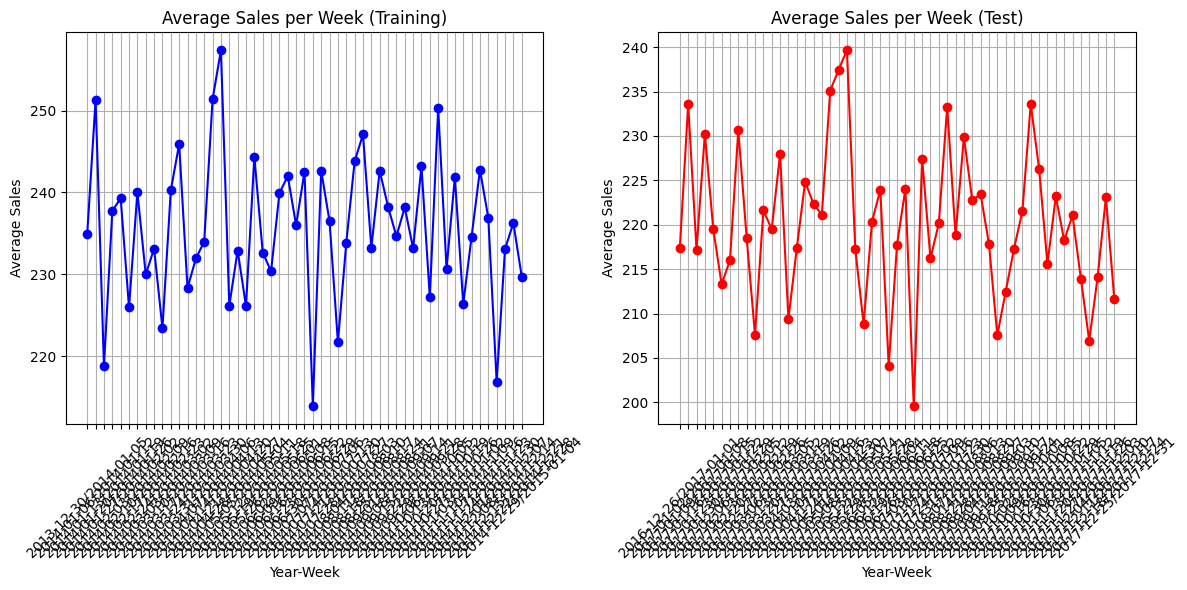

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the year-week format from 'Order Date' to group by week
train_data['Year-Week'] = train_data['Order Date'].dt.to_period('W')
test_data['Year-Week'] = test_data['Order Date'].dt.to_period('W')
print(train_data.shape)
# Group by 'Year-Week' and calculate the average sales per week for both datasets
avg_sales_per_week_train = train_data.groupby('Year-Week')['Sales'].mean()
avg_sales_per_week_test = test_data.groupby('Year-Week')['Sales'].mean()

# Plot the average sales per week for the training dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_sales_per_week_train.index.astype(str), avg_sales_per_week_train.values, marker='o', linestyle='-', color='b')
plt.title('Average Sales per Week (Training)')
plt.xlabel('Year-Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Plot the average sales per week for the test dataset
plt.subplot(1, 2, 2)
plt.plot(avg_sales_per_week_test.index.astype(str), avg_sales_per_week_test.values, marker='o', linestyle='-', color='r')
plt.title('Average Sales per Week (Test)')
plt.xlabel('Year-Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [138]:
import pandas as pd
import numpy as np
from itertools import product, combinations

# Define your quality measure functions
def entropy_quality(subgroup_size, total_size, rest_size):
    if subgroup_size == 0 or rest_size == 0:
        return 0  # Avoid NaN
    # Calculate entropy based on the formula given
    p_s = subgroup_size / total_size
    p_r = rest_size / total_size
    return -p_s * np.log(p_s) - p_r * np.log(p_r)

def distribution_difference(subgroup_data, rest_data, total_size):
    if rest_data == 0:
        return 0  # Avoid NaN
    # Use the third formula from your definition
    return (1 / total_size) * np.sum(np.abs((subgroup_data - rest_data) / rest_data))

def quality_measure(subgroup, df):
    # Total data size (unique people in the entire dataset)
    total_size = df['Customer ID'].nunique()
    
    # Subgroup size (unique people in the subgroup)
    subgroup_size = subgroup['Customer ID'].nunique()
    
    # Rest of the data size
    rest_size = total_size - subgroup_size
    
    # Use regular sales data for both subgroup and rest of the data
    sales_subgroup = subgroup['Sales'].mean()
    sales_rest = df.loc[~df.index.isin(subgroup.index), 'Sales'].mean()
    
    # Calculate entropy quality
    entropy = entropy_quality(subgroup_size, total_size, rest_size)
    
    # Calculate distribution difference in sales (without smoothing)
    distribution_diff = distribution_difference(sales_subgroup, sales_rest, total_size)
    
    # Total quality measure
    return entropy * distribution_diff

# Subgroup discovery based on combinations of attribute values
def discover_subgroups(df, attributes, k=5):
    best_subgroups = []
    
    # Iterate over all possible subsets of attributes (including empty subset)
    for subset_length in range(1, len(attributes) + 1):
        for subset in combinations(attributes, subset_length):
            # Generate all possible combinations of attribute values for this subset of attributes
            attribute_values = [df[attribute].unique() for attribute in subset]
            all_combinations = list(product(*attribute_values))
            
            # Iterate over all combinations of attribute values
            for combination in all_combinations:
                # Create a boolean mask to filter the dataframe for this subgroup
                mask = np.ones(len(df), dtype=bool)
                subgroup_description = {}
                
                for i, attribute in enumerate(subset):
                    mask = mask & (df[attribute] == combination[i])
                    subgroup_description[attribute] = combination[i]
                
                # Define the subgroup using the mask
                subgroup = df[mask]
                
                # Only consider subgroups with at least one unique customer
                if subgroup['Customer ID'].nunique() > 0:
                    # Calculate the quality measure for the subgroup
                    quality = quality_measure(subgroup, df)
                    
                    # Append the subgroup with its attributes, quality, and unique size (based on Customer ID)
                    best_subgroups.append({
                        "Attributes": subgroup_description,  # Combination of attribute values
                        "Quality": quality,
                        "Group Size (Unique Customers)": subgroup['Customer ID'].nunique()
                    })
    
    # Sort the subgroups by quality in descending order and return the top k
    best_subgroups = sorted(best_subgroups, key=lambda x: x['Quality'], reverse=True)[:k]
    
    return best_subgroups

# Example: Subgroup discovery based on 'Sub-Category', 'Segment', 'Region', and 'Ship Mode'
attributes = ['Sub-Category', 'Segment', 'Region', 'Ship Mode']  # Variables for subgroup discovery
best_subgroups_train = discover_subgroups(train_data, attributes, k=900)

# Convert the list of dictionaries (best_subgroups) into a DataFrame for better visualization
subgroup_details_df_train = pd.DataFrame(best_subgroups_train)

# Display the entire DataFrame (all rows)
pd.set_option('display.max_rows', None)

# Output the DataFrame
subgroup_details_df_train


,Attributes,Quality,Group Size (Unique Customers)
0,"{'Sub-Category': 'Phones', 'Segment': 'Consume...",0.000047,136
1,"{'Sub-Category': 'Phones', 'Segment': 'Consume...",0.000043,78
2,"{'Sub-Category': 'Phones', 'Segment': 'Consume...",0.000042,53
3,"{'Sub-Category': 'Phones', 'Region': 'West', '...",0.000039,96
4,"{'Sub-Category': 'Phones', 'Region': 'West'}",0.000037,148
5,"{'Sub-Category': 'Phones', 'Ship Mode': 'Stand...",0.000035,256
6,"{'Sub-Category': 'Phones', 'Segment': 'Consumer'}",0.000033,200
7,"{'Sub-Category': 'Bookcases', 'Region': 'East'}",0.000033,49
8,{'Sub-Category': 'Machines'},0.000032,74
9,"{'Sub-Category': 'Chairs', 'Region': 'West'}",0.000030,125


In [143]:
import pandas as pd
import numpy as np

# Define the indicator function
def indicator_function(A_S, A_ref, Y_S, Y_ref, theta):
    # If any of the values are NaN, return NaN
    if pd.isna(Y_S) or pd.isna(Y_ref):
        return np.nan
    
    if A_S != A_ref and (Y_S - Y_ref) > theta:
        return 1
    elif A_S != A_ref and (Y_S - Y_ref) < -theta:
        return -1
    else:
        return 0

# Detect Turning Points based on indicator values, skip NaN in turning points detection
def detect_turning_points(indicator_series, n_min=2):
    turning_points = []
    current_value = None
    run_length = 0
    
    for t in range(len(indicator_series)):
        # Skip NaN values when detecting turning points
        if pd.isna(indicator_series[t]):
            continue  # Ignore NaN values for turning points
        
        if current_value is None:  # Initialization for the first non-NaN value
            current_value = indicator_series[t]
            run_length = 1
            continue

        if indicator_series[t] == current_value:
            run_length += 1
        else:
            # Check if the run length is valid (n_min) and not at the start or end
            if run_length >= n_min and t != 1 and t != len(indicator_series) - 1:
                turning_points.append((t - run_length, current_value))
            current_value = indicator_series[t]
            run_length = 1

    # Handle the last segment if it meets the conditions
    if run_length >= n_min and len(indicator_series) > 1:
        turning_points.append((len(indicator_series) - run_length, current_value))

    return turning_points

# Apply the indicator function to each subgroup and detect turning points
def analyze_subgroups_with_indicator(subgroups, df, controllable_attributes, target_attribute, time_unit='W', percentage=5, n_min=2):
    updated_subgroups = []
    
    # Ensure "Order Date" is in datetime format
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    
    # Create a new time period column based on months ('M') or weeks ('W')
    df['Time Period'] = df['Order Date'].dt.to_period(time_unit)  # 'M' for months, 'W' for weeks
    
    # DEBUG: Print unique time periods to confirm it's by months
    print(f"Unique time periods (should be months): {df['Time Period'].unique()}")

    # Define the complete time index for months
    complete_time_index = pd.period_range(start=df['Time Period'].min(), end=df['Time Period'].max(), freq=time_unit)

    for subgroup in subgroups:
        # Extract the subgroup data based on attributes (constant controllable value for the whole subgroup)
        mask = np.ones(len(df), dtype=bool)
        for attr, value in subgroup['Attributes'].items():
            mask = mask & (df[attr] == value)
        subgroup_data = df[mask]

        # Fix `A_S_t` as the discount category of this subgroup
        A_S_t = subgroup_data[controllable_attributes].unique()[0]
        
        # Initialize the indicator values list
        indicator_values = []
        
        # Create the actual "subgroup" (matching controlled value) and "reference group" (excluding controlled value)
        subgroup_controlled = subgroup_data[subgroup_data[controllable_attributes] == A_S_t]
        reference_data = subgroup_data[subgroup_data[controllable_attributes] != A_S_t]
        
        if subgroup_controlled.empty or reference_data.empty:
            print("Skipping empty subgroup or reference group")
            continue

        A_ref_t = reference_data[controllable_attributes].mode()[0]  # Reference controllable attribute using mode for categorical data
        Y_ref_t = reference_data.groupby('Time Period')[target_attribute].mean()  # Group by time period and take mean of target attribute
        theta = percentage / 100 * Y_ref_t.mean()  # Calculate the threshold as a percentage of Y_ref mean
        
        # Group the subgroup data by time period (month/week) and calculate the mean for numeric columns
        subgroup_period = subgroup_controlled.groupby('Time Period').agg({target_attribute: 'mean'})  # Mean for numeric

        # Reindex to ensure we have consistent time periods
        subgroup_period = subgroup_period.reindex(complete_time_index, fill_value=np.nan)
        Y_ref_t = Y_ref_t.reindex(complete_time_index, fill_value=np.nan)

        for month, row in subgroup_period.iterrows():
            Y_S_t = row[target_attribute]  # Target variable value for the subgroup at the current time period
            
            # Use mean of reference group for comparison
            Y_ref_monthly = Y_ref_t.loc[month] if pd.notna(Y_ref_t.loc[month]) else np.nan  # Return NaN if the reference value is missing

            indicator_value = indicator_function(A_S_t, A_ref_t, Y_S_t, Y_ref_monthly, theta)
            
            # Add indicator value (NaNs are allowed here)
            indicator_values.append(indicator_value)
        
        # Detect turning points based on the indicator values (ignoring NaNs in detection)
        turning_points = detect_turning_points(indicator_values, n_min=n_min)
        
        # Ensure there is a non-NaN turning point at t = 0
        if pd.isna(indicator_values[0]):
            # Find the first non-NaN value and treat it as the new starting point
            for idx, val in enumerate(indicator_values):
                if not pd.isna(val):
                    turning_points.insert(0, (idx, val))
                    break
        else:
            # Add turning point at t = 0 if it's valid (not NaN)
            turning_points.insert(0, (0, indicator_values[0]))  
        
        # Exclude turning point at t = 0 from the quality count
        quality = len([tp for tp in turning_points if tp[0] != 0])
        
        # Update the subgroup with the detected turning points and add the discount category
        updated_subgroups.append({
            "Attributes": subgroup['Attributes'],
            "Quality": quality,  # Exclude t = 0 turning points from the quality measure
            "Group Size (Unique Customers)": subgroup['Group Size (Unique Customers)'],
            "Turning Points": turning_points,  # Add the detected turning points (including t = 0)
            "Indicator Values": indicator_values,  # Add the calculated indicator values
            "Discount Category": A_S_t  # Add the fixed discount category for this subgroup
        })
    
    return updated_subgroups

# Example subgroups (replace 'best_subgroups_train' with actual subgroup data)
subgroups = best_subgroups_train

# Analyze the subgroups and find turning points (with consistent time periods for months)
controllable_attributes = 'Discount Category'  # Using 'Discount Category' as the controllable attribute
target_attribute = 'Profit'  # The target variable for the analysis
time_unit = 'W'  # 'M' for months, 'W' for weeks
percentage = 3  # Percentage difference threshold for turning point detection
n_min = 3  # Minimum number of consecutive indicator values to confirm a turning point

# Analyze the subgroups and detect turning points (on a monthly or weekly basis)
updated_subgroups = analyze_subgroups_with_indicator(subgroups, train_data, controllable_attributes, target_attribute, time_unit, percentage, n_min)

# Convert the updated subgroups into a DataFrame for better visualization
subgroup_details_df = pd.DataFrame(updated_subgroups)

# Sort the resulting dataframe by the "Quality" column in descending order
subgroup_details_df_sorted = subgroup_details_df.sort_values(by="Quality", ascending=False)

# Display the sorted DataFrame
pd.set_option('display.max_rows', None)

# Print the entire DataFrame with turning points
subgroup_details_df_sorted


C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\4073953849.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\4073953849.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Period'] = df['Order Date'].dt.to_period(time_unit)  # 'M' for months, 'W' for weeks


Unique time periods (should be months): <PeriodArray>
['2014-11-03/2014-11-09', '2014-06-09/2014-06-15', '2014-10-06/2014-10-12',
 '2014-12-01/2014-12-07', '2014-11-17/2014-11-23', '2014-11-10/2014-11-16',
 '2014-05-12/2014-05-18', '2014-08-25/2014-08-31', '2014-12-08/2014-12-14',
 '2014-09-22/2014-09-28', '2014-01-13/2014-01-19', '2014-09-15/2014-09-21',
 '2014-12-22/2014-12-28', '2014-07-14/2014-07-20', '2014-03-10/2014-03-16',
 '2014-10-20/2014-10-26', '2014-06-16/2014-06-22', '2014-04-14/2014-04-20',
 '2014-11-24/2014-11-30', '2014-04-28/2014-05-04', '2014-06-02/2014-06-08',
 '2014-04-21/2014-04-27', '2014-09-01/2014-09-07', '2014-03-31/2014-04-06',
 '2014-01-27/2014-02-02', '2014-10-13/2014-10-19', '2014-02-24/2014-03-02',
 '2014-05-26/2014-06-01', '2014-05-05/2014-05-11', '2014-09-08/2014-09-14',
 '2014-08-04/2014-08-10', '2014-12-15/2014-12-21', '2014-10-27/2014-11-02',
 '2014-03-17/2014-03-23', '2014-07-28/2014-08-03', '2014-02-03/2014-02-09',
 '2013-12-30/2014-01-05', '2014-01

,Attributes,Quality,Group Size (Unique Customers),Turning Points,Indicator Values,Discount Category
160,"{'Region': 'East', 'Ship Mode': 'Standard Class'}",8,399,"[(0, -1), (1, -1), (8, -1), (12, -1), (33, 1),...","[-1, -1, -1, -1, nan, -1, 1, nan, -1, -1, -1, ...",High discount
46,{'Ship Mode': 'First Class'},8,378,"[(2, 1), (8, 1), (11, -1), (23, 1), (29, -1), ...","[nan, nan, 1, nan, -1, -1, nan, nan, 1, 1, 1, ...",Low discount
243,"{'Sub-Category': 'Binders', 'Ship Mode': 'Stan...",7,393,"[(0, 1), (2, -1), (10, -1), (13, 1), (17, -1),...","[1, nan, -1, -1, -1, 0, -1, 1, nan, 1, -1, -1,...",Low discount
566,"{'Sub-Category': 'Art', 'Segment': 'Consumer',...",7,134,"[(1, 1), (8, -1), (15, -1), (32, -1), (35, 1),...","[nan, 1, nan, nan, nan, nan, -1, nan, nan, -1,...",No discount
13,"{'Segment': 'Consumer', 'Region': 'Central'}",7,263,"[(3, -1), (6, 1), (18, 1), (29, 1), (34, 1), (...","[nan, nan, nan, -1, -1, 1, 1, nan, 1, 1, 1, 1,...",No discount
63,"{'Segment': 'Consumer', 'Ship Mode': 'Second C...",7,225,"[(2, 1), (8, 1), (11, -1), (18, 1), (31, 1), (...","[nan, nan, 1, nan, -1, nan, 0, nan, 1, 1, 1, -...",No discount
245,{'Ship Mode': 'Second Class'},7,439,"[(0, -1), (4, -1), (9, 1), (19, -1), (22, 1), ...","[-1, 1, 1, 0, -1, -1, -1, 1, -1, 1, 1, 1, -1, ...",No discount
617,"{'Segment': 'Consumer', 'Region': 'South'}",7,211,"[(1, 1), (5, 1), (12, 1), (29, -1), (33, 1), (...","[nan, 1, -1, 1, 1, nan, nan, 1, 1, -1, 1, -1, ...",No discount
111,{'Region': 'Central'},7,506,"[(0, 0), (5, -1), (17, -1), (21, -1), (26, 1),...","[0, -1, nan, nan, 1, -1, -1, -1, -1, -1, 1, -1...",High discount
791,"{'Sub-Category': 'Art', 'Ship Mode': 'Standard...",7,261,"[(0, 1), (3, 1), (13, -1), (17, 1), (25, 1), (...","[1, 1, nan, 1, nan, nan, -1, nan, 1, -1, -1, 1...",No discount


Code below makes sure you get filtered subgroups with quality higher than 1, and no rows where at least 3 NaN values are present in the list are discarded


In [147]:

# Filter the dataframe where Quality is at least 1 and at most 3 NaN values in Indicator Values
filtered_subgroups = subgroup_details_df_sorted[
    (subgroup_details_df_sorted['Quality'] >= 1) &
    (subgroup_details_df_sorted['Indicator Values'].apply(lambda x: np.isnan(x).sum() <= 30))
]

# Count the number of rows that meet the conditions
num_filtered_rows = filtered_subgroups.shape[0]

# Display the filtered DataFrame and the number of rows
print(f"Number of rows after filtering: {num_filtered_rows}")
filtered_subgroups


Number of rows after filtering: 104


,Attributes,Quality,Group Size (Unique Customers),Turning Points,Indicator Values,Discount Category
160,"{'Region': 'East', 'Ship Mode': 'Standard Class'}",8,399,"[(0, -1), (1, -1), (8, -1), (12, -1), (33, 1),...","[-1, -1, -1, -1, nan, -1, 1, nan, -1, -1, -1, ...",High discount
46,{'Ship Mode': 'First Class'},8,378,"[(2, 1), (8, 1), (11, -1), (23, 1), (29, -1), ...","[nan, nan, 1, nan, -1, -1, nan, nan, 1, 1, 1, ...",Low discount
243,"{'Sub-Category': 'Binders', 'Ship Mode': 'Stan...",7,393,"[(0, 1), (2, -1), (10, -1), (13, 1), (17, -1),...","[1, nan, -1, -1, -1, 0, -1, 1, nan, 1, -1, -1,...",Low discount
566,"{'Sub-Category': 'Art', 'Segment': 'Consumer',...",7,134,"[(1, 1), (8, -1), (15, -1), (32, -1), (35, 1),...","[nan, 1, nan, nan, nan, nan, -1, nan, nan, -1,...",No discount
13,"{'Segment': 'Consumer', 'Region': 'Central'}",7,263,"[(3, -1), (6, 1), (18, 1), (29, 1), (34, 1), (...","[nan, nan, nan, -1, -1, 1, 1, nan, 1, 1, 1, 1,...",No discount
63,"{'Segment': 'Consumer', 'Ship Mode': 'Second C...",7,225,"[(2, 1), (8, 1), (11, -1), (18, 1), (31, 1), (...","[nan, nan, 1, nan, -1, nan, 0, nan, 1, 1, 1, -...",No discount
245,{'Ship Mode': 'Second Class'},7,439,"[(0, -1), (4, -1), (9, 1), (19, -1), (22, 1), ...","[-1, 1, 1, 0, -1, -1, -1, 1, -1, 1, 1, 1, -1, ...",No discount
617,"{'Segment': 'Consumer', 'Region': 'South'}",7,211,"[(1, 1), (5, 1), (12, 1), (29, -1), (33, 1), (...","[nan, 1, -1, 1, 1, nan, nan, 1, 1, -1, 1, -1, ...",No discount
111,{'Region': 'Central'},7,506,"[(0, 0), (5, -1), (17, -1), (21, -1), (26, 1),...","[0, -1, nan, nan, 1, -1, -1, -1, -1, -1, 1, -1...",High discount
791,"{'Sub-Category': 'Art', 'Ship Mode': 'Standard...",7,261,"[(0, 1), (3, 1), (13, -1), (17, 1), (25, 1), (...","[1, 1, nan, 1, nan, nan, -1, nan, 1, -1, -1, 1...",No discount


Plot turning points on plot of the respective training data:

C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\1373675967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Order Date'] = pd.to_datetime(train_data['Order Date'])
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\1373675967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Time Period'] = train_data['Order Date'].dt.to_period(time_unit)  # 'M' for months, 'W' for weeks


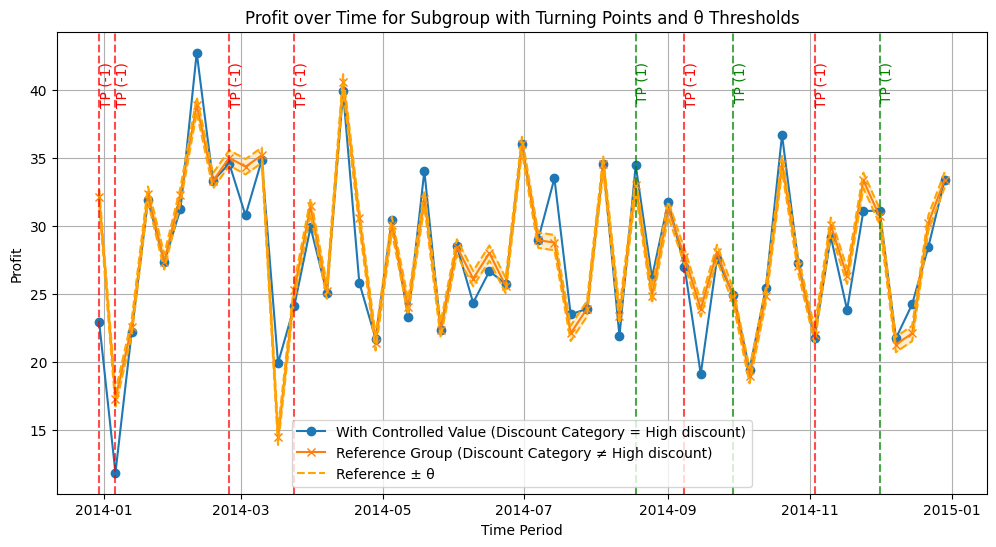

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'Order Date' is in datetime format and create 'Time Period' column
train_data['Order Date'] = pd.to_datetime(train_data['Order Date'])
train_data['Time Period'] = train_data['Order Date'].dt.to_period(time_unit)  # 'M' for months, 'W' for weeks

# Define the complete time index for consistent time periods
complete_time_index = pd.period_range(start=train_data['Time Period'].min(), end=train_data['Time Period'].max(), freq=time_unit)

# Extract the desired subgroup from the sorted DataFrame
first_row = subgroup_details_df_sorted.iloc[0]  # Adjust the index as needed
attributes = first_row['Attributes']
A_S_t = first_row['Discount Category']  # The controlled variable value
controllable_attributes = 'Discount Category'  # The controllable attribute
target_attribute = 'Profit'  # The target variable for analysis
percentage = 2  # The percentage used in the theta calculation

# Create mask matching all subgroup attributes (including controllable attribute)
mask = np.ones(len(train_data), dtype=bool)
for attr, value in attributes.items():
    mask &= (train_data[attr] == value)
data_with_controlled_value = train_data[mask]

# Reference data: data matching subgroup attributes except controllable attribute, and controllable attribute not equal to A_S_t
mask_reference = np.ones(len(train_data), dtype=bool)
for attr, value in attributes.items():
    if attr != controllable_attributes:
        mask_reference &= (train_data[attr] == value)
data_without_controlled_value = train_data[mask_reference & (train_data[controllable_attributes] != A_S_t)]

# Group the data by 'Time Period' and calculate the mean of the target attribute
grouped_with = data_with_controlled_value.groupby('Time Period')[target_attribute].mean().reindex(complete_time_index, fill_value=np.nan)
grouped_without = data_without_controlled_value.groupby('Time Period')[target_attribute].mean().reindex(complete_time_index, fill_value=np.nan)

# Calculate theta (θ) as a percentage of the overall mean of the reference group
theta = percentage / 100 * grouped_without.mean()  # Scalar value

# Calculate the upper and lower thresholds
upper_threshold = grouped_without + theta
lower_threshold = grouped_without - theta

# Extract the indicator values and turning points
indicator_values = first_row['Indicator Values']
turning_points = first_row['Turning Points']

# Create a DataFrame for indicator values
indicator_df = pd.DataFrame({
    'Time Period': complete_time_index,
    'Indicator Value': indicator_values
})
indicator_df.set_index('Time Period', inplace=True)

# Plot the target attribute over time for both datasets
plt.figure(figsize=(12, 6))
plt.plot(grouped_with.index.to_timestamp(), grouped_with.values, marker='o', label=f"With Controlled Value ({controllable_attributes} = {A_S_t})")
plt.plot(grouped_without.index.to_timestamp(), grouped_without.values, marker='x', label=f"Reference Group ({controllable_attributes} ≠ {A_S_t})")

# Plot the θ thresholds around the reference plotline
plt.plot(upper_threshold.index.to_timestamp(), upper_threshold.values, linestyle='--', color='orange', label=f'Reference ± θ')
plt.plot(lower_threshold.index.to_timestamp(), lower_threshold.values, linestyle='--', color='orange')

# Fill the area between the thresholds for visualization
plt.fill_between(upper_threshold.index.to_timestamp(), lower_threshold.values, upper_threshold.values, color='orange', alpha=0.2)

# Plot vertical lines at the turning point periods
for tp in turning_points:
    index, value = tp  # index in indicator_values
    time_period = complete_time_index[index].to_timestamp()
    # Choose color based on the turning point value
    if value == 1:
        color = 'green'  # Positive turning point
    elif value == -1:
        color = 'red'    # Negative turning point
    else:
        color = 'grey'   # Neutral
    plt.axvline(x=time_period, color=color, linestyle='--', alpha=0.7)
    # Optionally, annotate the turning point
    plt.text(time_period, plt.ylim()[1]*0.95, f'TP ({value})', rotation=90, verticalalignment='top', color=color)

plt.xlabel('Time Period')
plt.ylabel(target_attribute)
plt.title('Profit over Time for Subgroup with Turning Points and θ Thresholds')
plt.legend()
plt.grid(True)
plt.show()



Test Data


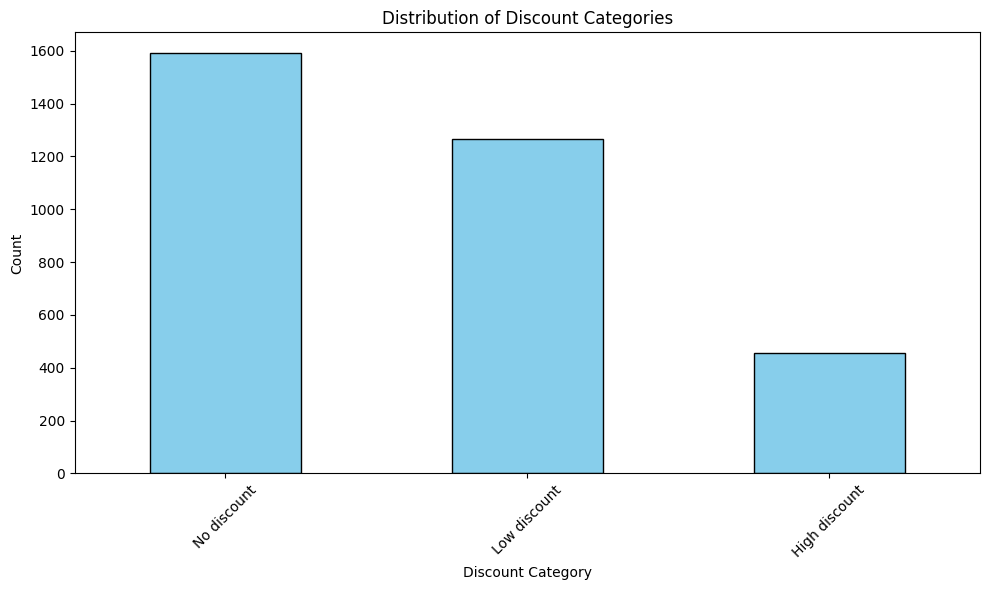

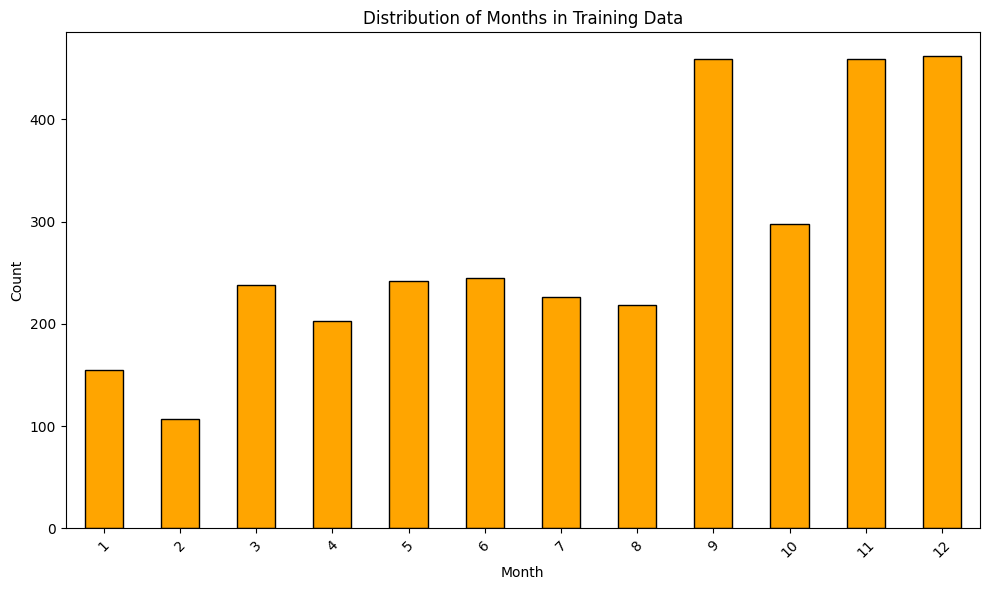

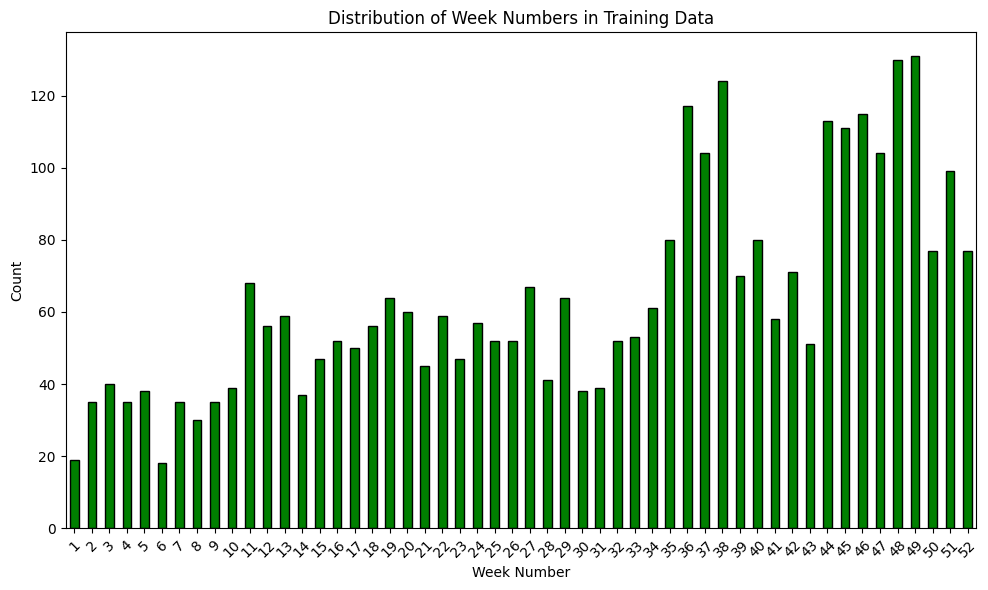

In [83]:
# Plot the distribution of discount categories in the test data
print("\nTest Data")

# Plot the distribution of discount categories in the test data
plot_discount_category_distribution(test_data)

# Plot the distribution of months in the test data
plot_month_distribution(test_data)

# Plot the distribution of week numbers in the test data
plot_week_distribution(test_data)


Make plot for turning points of train data (but then on unseen data):

C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\578186764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Order Date'] = pd.to_datetime(test_data['Order Date'])
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\578186764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Time Period'] = test_data['Order Date'].dt.to_period('W')  # 'M' for months, 'W' for weeks


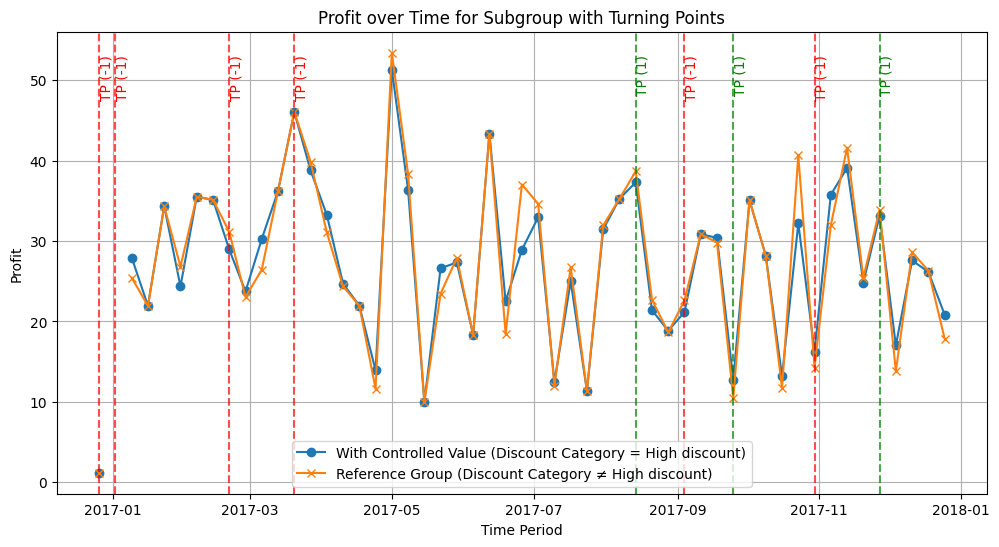

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Order Date' is in datetime format and create 'Time Period' column
test_data['Order Date'] = pd.to_datetime(test_data['Order Date'])
test_data['Time Period'] = test_data['Order Date'].dt.to_period('W')  # 'M' for months, 'W' for weeks

# Define the complete time index for consistent time periods
complete_time_index = pd.period_range(start=test_data['Time Period'].min(), end=test_data['Time Period'].max(), freq='W')

# Extract the desired subgroup from the sorted DataFrame
first_row = filtered_subgroups.iloc[0]  # Adjust the index as needed
attributes = first_row['Attributes']
A_S_t = first_row['Discount Category']  # The controlled variable value
controllable_attributes = 'Discount Category'  # The controllable attribute
target_attribute = 'Profit'  # The target variable for analysis

# Create mask matching all subgroup attributes (including controllable attribute)
mask = np.ones(len(test_data), dtype=bool)
for attr, value in attributes.items():
    mask &= (test_data[attr] == value)
data_with_controlled_value = test_data[mask]

# Reference data: data matching subgroup attributes except controllable attribute, and controllable attribute not equal to A_S_t
mask_reference = np.ones(len(test_data), dtype=bool)
for attr, value in attributes.items():
    if attr != controllable_attributes:
        mask_reference &= (test_data[attr] == value)
data_without_controlled_value = test_data[mask_reference & (test_data[controllable_attributes] != A_S_t)]

# Group the data by 'Time Period' and calculate the mean of the target attribute
grouped_with = data_with_controlled_value.groupby('Time Period')[target_attribute].mean().reindex(complete_time_index, fill_value=np.nan)
grouped_without = data_without_controlled_value.groupby('Time Period')[target_attribute].mean().reindex(complete_time_index, fill_value=np.nan)

# Extract the indicator values and turning points
indicator_values = first_row['Indicator Values']
turning_points = first_row['Turning Points']

# Create a DataFrame for indicator values
indicator_df = pd.DataFrame({
    'Time Period': complete_time_index,
    'Indicator Value': indicator_values
})
indicator_df.set_index('Time Period', inplace=True)

# Plot the target attribute over time for both datasets
plt.figure(figsize=(12, 6))
plt.plot(grouped_with.index.to_timestamp(), grouped_with.values, marker='o', label=f"With Controlled Value ({controllable_attributes} = {A_S_t})")
plt.plot(grouped_without.index.to_timestamp(), grouped_without.values, marker='x', label=f"Reference Group ({controllable_attributes} ≠ {A_S_t})")

# Plot vertical lines at the turning point periods
for tp in turning_points:
    index, value = tp  # index in indicator_values
    time_period = complete_time_index[index].to_timestamp()
    # Choose color based on the turning point value
    if value == 1:
        color = 'green'  # Positive turning point
    elif value == -1:
        color = 'red'    # Negative turning point
    else:
        color = 'grey'   # Neutral
    plt.axvline(x=time_period, color=color, linestyle='--', alpha=0.7)
    # Optionally, annotate the turning point
    plt.text(time_period, plt.ylim()[1]*0.95, f'TP ({value})', rotation=90, verticalalignment='top', color=color)

plt.xlabel('Time Period')
plt.ylabel(target_attribute)
plt.title('Profit over Time for Subgroup with Turning Points')
plt.legend()
plt.grid(True)
plt.show()


Calculate mean and stdev whe using reular temporal EMM (take conrollable action that is maximizing)

In [152]:
import pandas as pd

def compare_and_maximize(subgroups, df, controllable_attribute, target_attribute):
    """
    For each subgroup, this function compares the average of the non-reference group (subgroup)
    with the reference group. It adds the higher average to a total and calculates the overall 
    mean, variance, and standard deviation across all subgroups.

    Parameters:
    - subgroups: DataFrame of subgroups to compare (filtered_subgroups).
    - df: The complete dataset (DataFrame).
    - controllable_attribute: The controllable attribute to compare (e.g., 'Discount Category').
    - target_attribute: The target variable being analyzed (e.g., 'Profit').

    Returns:
    - A tuple containing the overall mean, variance, and standard deviation of the maximum values
      from all subgroup comparisons.
    """
    max_values = []  # Store the maximum values for each subgroup

    # Loop through each subgroup and perform comparison
    for _, subgroup in subgroups.iterrows():
        attributes = subgroup['Attributes']
        A_S_t = subgroup['Discount Category']  # The controlled variable value

        # Create mask matching all subgroup attributes (including controllable attribute)
        mask = np.ones(len(df), dtype=bool)
        for attr, value in attributes.items():
            mask &= (df[attr] == value)
        data_with_controlled_value = df[mask]

        # Reference data: data matching subgroup attributes except controllable attribute, 
        # and controllable attribute not equal to A_S_t
        mask_reference = np.ones(len(df), dtype=bool)
        for attr, value in attributes.items():
            if attr != controllable_attribute:
                mask_reference &= (df[attr] == value)
        data_without_controlled_value = df[mask_reference & (df[controllable_attribute] != A_S_t)]

        # Group the data by 'Time Period' and calculate the mean of the target attribute
        grouped_with = data_with_controlled_value.groupby('Time Period')[target_attribute].mean()
        grouped_without = data_without_controlled_value.groupby('Time Period')[target_attribute].mean()

        # Calculate the means of the subgroup (non-reference group) and reference group
        subgroup_mean = grouped_with.mean()
        reference_mean = grouped_without.mean()

        # DEBUG: Print each subgroup comparison for verification
        print(f"Subgroup: {attributes}, Subgroup Mean: {subgroup_mean}, Reference Mean: {reference_mean}")

        # Add the maximum of the two means to the list of maximum values
        if not np.isnan(subgroup_mean) and not np.isnan(reference_mean):
            max_values.append(max(subgroup_mean, reference_mean))

    # Calculate the overall mean, variance, and standard deviation of the maximum values
    if len(max_values) > 0:
        overall_mean = np.mean(max_values)
        overall_variance = np.var(max_values, ddof=1)  # Sample variance (ddof=1)
        overall_std_dev = np.std(max_values, ddof=1)   # Sample standard deviation (ddof=1)
    else:
        overall_mean = np.nan
        overall_variance = np.nan
        overall_std_dev = np.nan

    return overall_mean, overall_variance, overall_std_dev

# Example usage:
# Assuming 'filtered_subgroups' is a DataFrame representing subgroups, and 'df' is the test dataset
overall_mean, overall_variance, overall_std_dev = compare_and_maximize(
    filtered_subgroups, 
    test_data, 
    controllable_attribute='Discount Category', 
    target_attribute='Profit'
)

print(f"Overall Mean of Maximum Values: {overall_mean}")
print(f"Overall Variance of Maximum Values: {overall_variance}")
print(f"Overall Standard Deviation of Maximum Values: {overall_std_dev}")


Subgroup: {'Region': 'East', 'Ship Mode': 'Standard Class'}, Subgroup Mean: 27.182141802105555, Reference Mean: 27.260089962857208
Subgroup: {'Ship Mode': 'First Class'}, Subgroup Mean: 26.68567065819291, Reference Mean: 27.85375044918081
Subgroup: {'Sub-Category': 'Binders', 'Ship Mode': 'Standard Class'}, Subgroup Mean: 26.29818445138062, Reference Mean: 25.600498928675265
Subgroup: {'Sub-Category': 'Art', 'Segment': 'Consumer', 'Ship Mode': 'Standard Class'}, Subgroup Mean: 28.04444216967906, Reference Mean: 29.44807875309207
Subgroup: {'Segment': 'Consumer', 'Region': 'Central'}, Subgroup Mean: 28.507450289416944, Reference Mean: 26.97031283380147
Subgroup: {'Segment': 'Consumer', 'Ship Mode': 'Second Class'}, Subgroup Mean: 29.177696360649225, Reference Mean: 28.241342979084397
Subgroup: {'Ship Mode': 'Second Class'}, Subgroup Mean: 27.20803156600107, Reference Mean: 26.386338923499142
Subgroup: {'Segment': 'Consumer', 'Region': 'South'}, Subgroup Mean: 29.87571971813311, Referenc

Clculate mean and stdev for THEMM on unseen data

In [154]:
import pandas as pd

def calculate_maximizing_strategy(subgroup_data, reference_data, turning_points, target_attribute):
    """
    This function calculates the average profit based on the maximizing strategy, where:
    - The subgroup strategy is applied when the turning point is positive (1).
    - The reference group strategy is applied when the turning point is negative (-1) or neutral (0).
    
    It returns the average of only the maximizing strategy values.
    
    Parameters:
    - subgroup_data: DataFrame of the non-reference group (subgroup) values
    - reference_data: DataFrame of the reference group values
    - turning_points: List of turning points (tuples) [(index, value), ...]
    - target_attribute: Column name for the target variable (e.g., 'Profit')
    
    Returns:
    - The average profit of the maximizing strategy
    """
    maximizing_values = []
    time_periods = subgroup_data.index

    # Traverse through turning points to apply maximizing strategy
    for tp in turning_points:
        index, value = tp  # index corresponds to time period, value indicates strategy

        if index >= len(time_periods):
            continue
        
        # Fetch the time period from the index and check if it exists in both dataframes
        time_period = time_periods[index]
        if time_period not in subgroup_data.index or time_period not in reference_data.index:
            continue

        subgroup_value = subgroup_data.loc[time_period]
        reference_value = reference_data.loc[time_period]

        # Apply maximizing strategy based on turning point value
        if value == 1:  # Use non-reference group (subgroup)
            if not pd.isna(subgroup_value):
                maximizing_values.append(subgroup_value)
        elif value == -1 or value == 0:  # Use reference group
            if not pd.isna(reference_value):
                maximizing_values.append(reference_value)

    # Compute and return the mean of the maximizing strategy values
    if len(maximizing_values) > 0:
        return np.mean(maximizing_values)
    else:
        return np.nan

# Ensure 'Order Date' is in datetime format and create 'Time Period' column in the test data
test_data['Order Date'] = pd.to_datetime(test_data['Order Date'])
test_data['Time Period'] = test_data['Order Date'].dt.to_period('W')  # 'M' for months

# Define the complete time index for consistent time periods
complete_time_index = pd.period_range(start=test_data['Time Period'].min(), end=test_data['Time Period'].max(), freq='W')

# Initialize a list to store the maximizing profits for all rows
all_maximizing_profits = []

# Loop through each row in the subgroup_details_df_sorted DataFrame
for index, row in filtered_subgroups.iterrows():
    attributes = row['Attributes']
    A_S_t = row['Discount Category']  # The controlled variable value
    controllable_attributes = 'Discount Category'  # The controllable attribute
    target_attribute = 'Profit'  # The target variable for analysis

    # Create mask matching all subgroup attributes (including controllable attribute)
    mask = np.ones(len(test_data), dtype=bool)
    for attr, value in attributes.items():
        mask &= (test_data[attr] == value)
    data_with_controlled_value = test_data[mask]

    # Reference data: data matching subgroup attributes except controllable attribute, and controllable attribute not equal to A_S_t
    mask_reference = np.ones(len(test_data), dtype=bool)
    for attr, value in attributes.items():
        if attr != controllable_attributes:
            mask_reference &= (test_data[attr] == value)
    data_without_controlled_value = test_data[mask_reference & (test_data[controllable_attributes] != A_S_t)]

    # Group the data by 'Time Period' and calculate the mean of the target attribute
    grouped_with = data_with_controlled_value.groupby('Time Period')[target_attribute].mean().reindex(complete_time_index, fill_value=np.nan)
    grouped_without = data_without_controlled_value.groupby('Time Period')[target_attribute].mean().reindex(complete_time_index, fill_value=np.nan)

    # Extract the indicator values and turning points
    indicator_values = row['Indicator Values']
    turning_points = row['Turning Points']

    # Calculate the maximizing strategy for the current row
    average_maximizing_profit = calculate_maximizing_strategy(
        subgroup_data=grouped_with,
        reference_data=grouped_without,
        turning_points=turning_points,
        target_attribute=target_attribute
    )

    # Append the result to the list if it's not NaN
    if not pd.isna(average_maximizing_profit):
        all_maximizing_profits.append(average_maximizing_profit)

# Calculate the overall mean and standard deviation of the maximizing profits
if len(all_maximizing_profits) > 0:
    overall_mean_maximizing_profit = np.mean(all_maximizing_profits)
    overall_std_dev_maximizing_profit = np.std(all_maximizing_profits, ddof=1)  # Sample standard deviation (ddof=1)
else:
    overall_mean_maximizing_profit = np.nan  # Return NaN if no valid maximizing profits were found
    overall_std_dev_maximizing_profit = np.nan

# Print the calculated overall mean and standard deviation of maximizing profits
print(f"Overall Mean of Maximizing Profits: {overall_mean_maximizing_profit}")
print(f"Overall Standard Deviation of Maximizing Profits: {overall_std_dev_maximizing_profit}")


C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\4209273284.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Order Date'] = pd.to_datetime(test_data['Order Date'])
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_5016\4209273284.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Time Period'] = test_data['Order Date'].dt.to_period('W')  # 'M' for months


Overall Mean of Maximizing Profits: 26.25852170175458
Overall Standard Deviation of Maximizing Profits: 9.690508993746517
